## CIND820 D1H - Big Data Analytics Project, F2023   
### Initial Coding  


###  Name: Irfan Ahmad 
###  SN: 501 231 340 
###  Tue, November 14, 2023

*****
Initial coding of this project is done in two parts: 

The first part uses simple regression to estimate gradient of total electric vehicle registration in each of Ontario's forward sortation area. The dataset comes from the Government of Ontario's quarterly reports on cumulative electric vehicle registrations grouped by forward sortation area. 

The second part of this initial coding uses multiple regression to estimate the same gradient based on economic factors obtained from the statistics provided by Revenue Canada. The dataset coming from Revenue Canada is also grouped by forward sortation areas.
*****

### Preparation

The dataset is related to EV Registration Count and Economic Factors by FSA. For more info: https://github.com/iresearch23/cind820

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing

### Part 1: Determine gradient for EV registration count 

Read the csv file from the local machine containing quarterly cumulative counts of EV registraions in each of Ontario's forward sortation area. This file can also be accessed via GitHub: https://github.com/iresearch23/cind820/blob/main/ontario_zev_cumulative_count_CLEANED.csv 




In [4]:
dfZevRegistration = pd.read_csv('C:\Tmu\CIND820\ontario_zev_cumulative_count_CLEANED.csv', encoding='utf-8') 
print(dfZevRegistration.shape)
dfZevRegistration.head(5)

(569, 8)


,FSA,EV2022Q1,EV2022Q2,EV2022Q3,EV2022Q4,EV2023Q1,EV2023Q2,EV2023Q3
0,K0A,645.0,745.0,871.0,928.0,987.0,1088.0,1195.0
1,K0B,95.0,103.0,107.0,118.0,119.0,131.0,145.0
2,K0C,167.0,193.0,215.0,234.0,242.0,269.0,302.0
3,K0E,128.0,140.0,155.0,162.0,173.0,182.0,208.0
4,K0G,197.0,223.0,254.0,272.0,294.0,326.0,352.0


Replace null values with 0: 

In [5]:
dfZevRegistration["EV2022Q1"].fillna(0, inplace = True) 
dfZevRegistration["EV2022Q2"].fillna(0, inplace = True) 
dfZevRegistration["EV2022Q3"].fillna(0, inplace = True) 
dfZevRegistration["EV2022Q4"].fillna(0, inplace = True) 
dfZevRegistration["EV2022Q1"].fillna(0, inplace = True) 
dfZevRegistration["EV2022Q2"].fillna(0, inplace = True) 
dfZevRegistration["EV2022Q3"].fillna(0, inplace = True) 

Add columns 'Yintercept' and 'Gradient with default values of zero to the dataframe 

In [6]:
dfZevRegistration['Yintercept'] = 0 
dfZevRegistration['Gradient']   = 0 
dfZevRegistration.head(5)

,FSA,EV2022Q1,EV2022Q2,EV2022Q3,EV2022Q4,EV2023Q1,EV2023Q2,EV2023Q3,Yintercept,Gradient
0,K0A,645.0,745.0,871.0,928.0,987.0,1088.0,1195.0,0,0
1,K0B,95.0,103.0,107.0,118.0,119.0,131.0,145.0,0,0
2,K0C,167.0,193.0,215.0,234.0,242.0,269.0,302.0,0,0
3,K0E,128.0,140.0,155.0,162.0,173.0,182.0,208.0,0,0
4,K0G,197.0,223.0,254.0,272.0,294.0,326.0,352.0,0,0


For each row in dfZevRegistration, estimate the gradient and y-intercept using simple regression:

   FSA  EV2022Q1  EV2022Q2  EV2022Q3  EV2022Q4  EV2023Q1  EV2023Q2  EV2023Q3  \
0  K0A     645.0     745.0     871.0     928.0     987.0    1088.0    1195.0   
1  K0B      95.0     103.0     107.0     118.0     119.0     131.0     145.0   
2  K0C     167.0     193.0     215.0     234.0     242.0     269.0     302.0   
3  K0E     128.0     140.0     155.0     162.0     173.0     182.0     208.0   
4  K0G     197.0     223.0     254.0     272.0     294.0     326.0     352.0   

   Yintercept    Gradient  
0   87.571429  660.000000  
1    7.785714   93.500000  
2   20.857143  169.142857  
3   12.214286  127.357143  
4   25.392857  197.821429  


EV Registrations = [ 95. 103. 107. 118. 119. 131. 145.]  
Coefficients = [93.5         7.78571429]


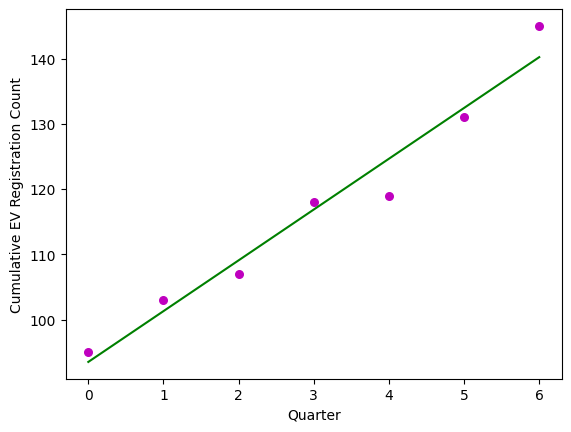



EV Registrations = [128. 140. 155. 162. 173. 182. 208.]  
Coefficients = [127.35714286  12.21428571]


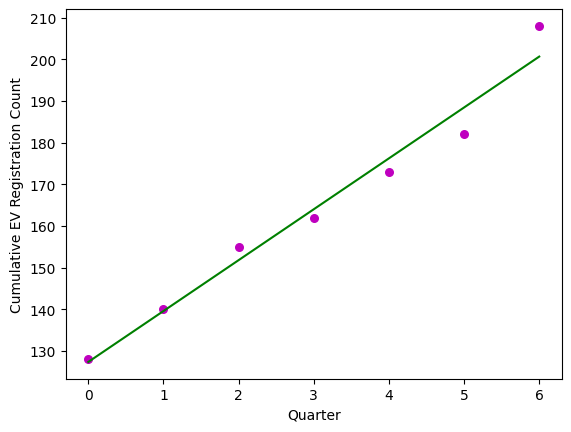



EV Registrations = [22. 25. 30. 34. 34. 41. 45.]  
Coefficients = [21.75  3.75]


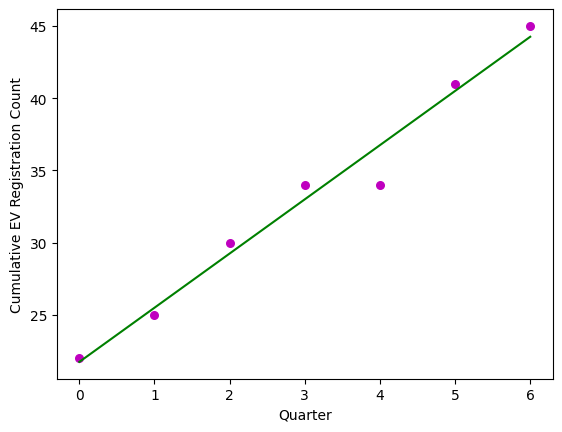



EV Registrations = [ 682.  765.  895. 1019. 1097. 1205. 1335.]  
Coefficients = [673.89285714 108.60714286]


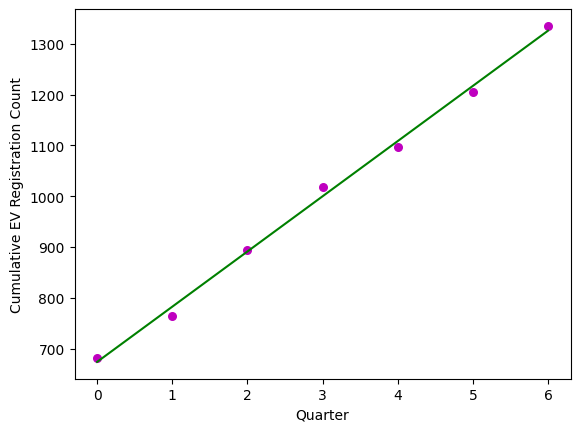



EV Registrations = [45. 50. 52. 55. 63. 68. 78.]  
Coefficients = [43.07142857  5.21428571]


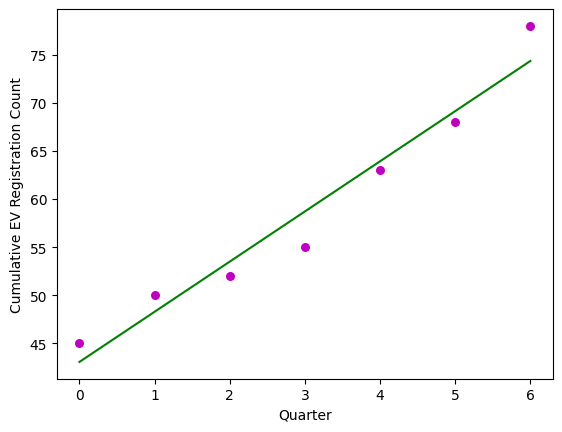

In [7]:
def estimateRegCoeff(x, y):
    
    # number of records:
    n = np.size(x)
 
    # mean of x and y vector
    mean_x = np.mean(x)
    mean_y = np.mean(y)
 
    # cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x
 
    # slope and y-intercept
    slope       = SS_xy / SS_xx
    y_intercept = mean_y - slope*mean_x
 
    return (y_intercept, slope) 


def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('Quarter')
    plt.ylabel('Cumulative EV Registration Count')
 
    # Show the plot
    plt.show()
    
 
def main(): 
        
    # 7 observations - 4 quarters in 2022, 3 quarters in 2023
    x = np.array([0,1,2,3,4,5,6]) 
    
    nRecords = len(dfZevRegistration) 
    
    for i in range(nRecords):
         
        y = np.array([])
        # appending to the array 
        evCell = dfZevRegistration['EV2022Q1'].values[i]
        y = np.append(y, [evCell])
        evCell = dfZevRegistration['EV2022Q2'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfZevRegistration['EV2022Q3'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfZevRegistration['EV2022Q4'].values[i]
        y = np.append(y, [evCell])
        evCell = dfZevRegistration['EV2023Q1'].values[i]
        y = np.append(y, [evCell])
        evCell = dfZevRegistration['EV2023Q2'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfZevRegistration['EV2023Q3'].values[i]
        y = np.append(y, [evCell]) 

        #print(y)
        # estimate simple regression coefficients
        b = estimateRegCoeff(x, y)
        #print("Estimated coefficients:\nintercept = {}  \nslope = {}".format(b[0], b[1])) 
        
        dfZevRegistration.loc[i,['Gradient','Yintercept']] = [b[0],b[1]] 
    
    print(dfZevRegistration.head(5))
 
    # See few plots of regression line 
    for i in (1,3,70,200, 450): 
        y = np.array([]) 
        b = np.array([])
        
        # appending registration count to the array 
        evCell = dfZevRegistration['EV2022Q1'].values[i]
        y = np.append(y, [evCell])
        evCell = dfZevRegistration['EV2022Q2'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfZevRegistration['EV2022Q3'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfZevRegistration['EV2022Q4'].values[i]
        y = np.append(y, [evCell])
        evCell = dfZevRegistration['EV2023Q1'].values[i]
        y = np.append(y, [evCell])
        evCell = dfZevRegistration['EV2023Q2'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfZevRegistration['EV2023Q3'].values[i]
        y = np.append(y, [evCell]) 
        
        #appending regression coefficients
        evCell = dfZevRegistration['Gradient'].values[i]
        b = np.append(b, [evCell])
        evCell = dfZevRegistration['Yintercept'].values[i]
        b = np.append(b, [evCell]) 
        
        print("\n\nEV Registrations = {}  \nCoefficients = {}".format(y, b))
        
        plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

### Part 2: Predict gradient based on Income and Source of Income

Read the csv file from the local machine containing personal income per source in each of Ontario's forward sortation area. This file can also be accessed via GitHub: https://github.com/iresearch23/cind820/blob/main/Ontario_Income_Amount_perSource_perPerson_CLEANED.csv

In [8]:
dfIncomeSource = pd.read_csv('C:\Tmu\CIND820\Ontario_Income_Amount_perSource_perPerson_CLEANED.csv', encoding='utf-8') 
print(dfIncomeSource.shape)
dfIncomeSource.head(5)

(525, 9)


,FSA,Urban,EmploymentIncomePP,SelfEmpIncomePP,PensionIncomePP,InvestmentIncomePP,BenefitIncomePP,OtherIncomePP,TFSAAmountPP
0,K0A,N,60257,16555,16943,13732,8563,9555,NaN
1,K0B,N,45741,11975,4042,11969,8107,9039,NaN
2,K0C,N,46746,12185,10008,12448,8120,8871,NaN
3,K0E,N,45128,11126,8384,13593,8492,9430,NaN
4,K0G,N,50326,11848,8893,13422,8416,9845,NaN


Remove column 'TFSAAmountPP' for now, it will be added after TFSA information is entered.

In [9]:
del dfIncomeSource['TFSAAmountPP'] 
dfIncomeSource.head(5) 

,FSA,Urban,EmploymentIncomePP,SelfEmpIncomePP,PensionIncomePP,InvestmentIncomePP,BenefitIncomePP,OtherIncomePP
0,K0A,N,60257,16555,16943,13732,8563,9555
1,K0B,N,45741,11975,4042,11969,8107,9039
2,K0C,N,46746,12185,10008,12448,8120,8871
3,K0E,N,45128,11126,8384,13593,8492,9430
4,K0G,N,50326,11848,8893,13422,8416,9845


Add column 'EVGradient' with default value of zero to the dataframe

In [10]:
dfIncomeSource['EVGradient']   = 0 
dfIncomeSource.head(5)

,FSA,Urban,EmploymentIncomePP,SelfEmpIncomePP,PensionIncomePP,InvestmentIncomePP,BenefitIncomePP,OtherIncomePP,EVGradient
0,K0A,N,60257,16555,16943,13732,8563,9555,0
1,K0B,N,45741,11975,4042,11969,8107,9039,0
2,K0C,N,46746,12185,10008,12448,8120,8871,0
3,K0E,N,45128,11126,8384,13593,8492,9430,0
4,K0G,N,50326,11848,8893,13422,8416,9845,0


Populate EVGradient from the Gradient values in dfZevRegistration:

In [11]:
nRecords = len(dfZevRegistration) 
    
for i in range(nRecords): 
        cFSA = dfZevRegistration['FSA'].values[i]
        cFSA = cFSA.strip()
        nGradient = dfZevRegistration['Gradient'].values[i] 
        
        
        dfIncomeSource.loc[dfIncomeSource['FSA'].str.contains(cFSA), 'EVGradient'] = nGradient 

dfIncomeSource.head(5) 


,FSA,Urban,EmploymentIncomePP,SelfEmpIncomePP,PensionIncomePP,InvestmentIncomePP,BenefitIncomePP,OtherIncomePP,EVGradient
0,K0A,N,60257,16555,16943,13732,8563,9555,660.000000
1,K0B,N,45741,11975,4042,11969,8107,9039,93.500000
2,K0C,N,46746,12185,10008,12448,8120,8871,169.142857
3,K0E,N,45128,11126,8384,13593,8492,9430,127.357143
4,K0G,N,50326,11848,8893,13422,8416,9845,197.821429


Visualize the data using scatter plot:

<Axes: xlabel='Urban', ylabel='EVGradient'>

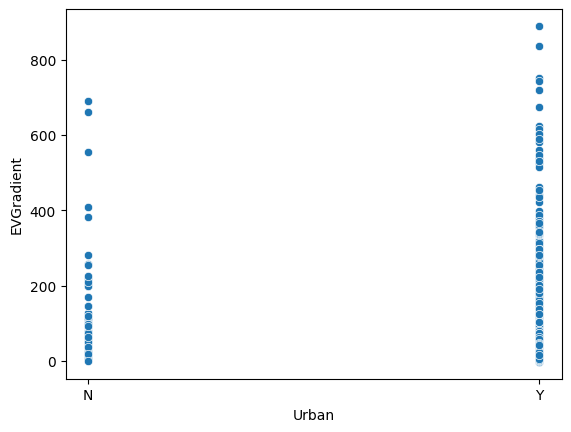

In [12]:
sns.scatterplot(x='Urban', 
                y='EVGradient', data=dfIncomeSource) 

<Axes: xlabel='EmploymentIncomePP', ylabel='EVGradient'>

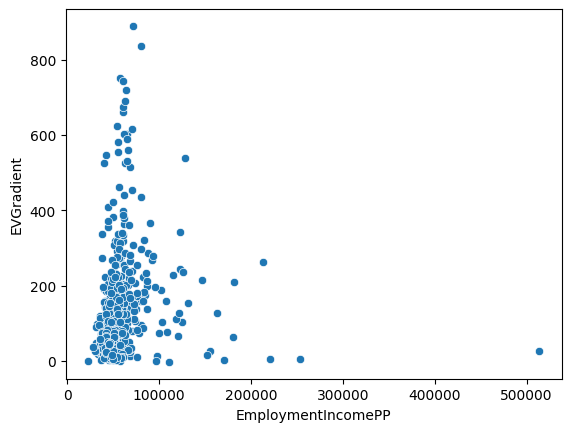

In [13]:
sns.scatterplot(x='EmploymentIncomePP', 
                y='EVGradient', data=dfIncomeSource)

<Axes: xlabel='SelfEmpIncomePP', ylabel='EVGradient'>

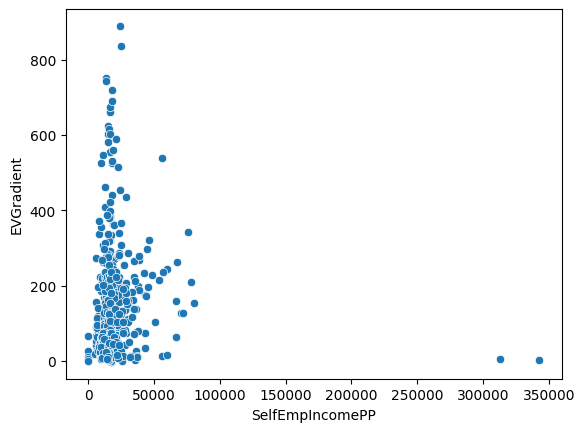

In [14]:
sns.scatterplot(x='SelfEmpIncomePP', 
                y='EVGradient', data=dfIncomeSource)

<Axes: xlabel='PensionIncomePP', ylabel='EVGradient'>

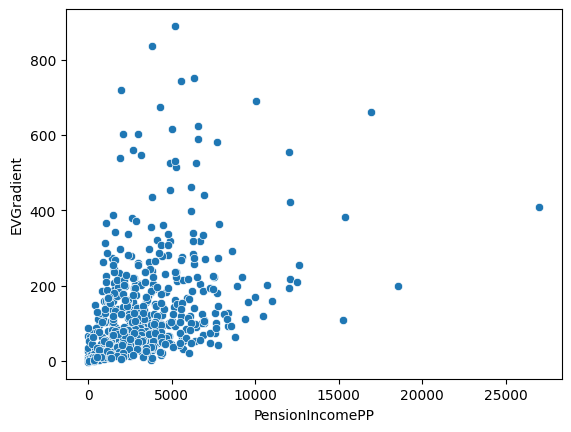

In [15]:
sns.scatterplot(x='PensionIncomePP', 
                y='EVGradient', data=dfIncomeSource)

<Axes: xlabel='InvestmentIncomePP', ylabel='EVGradient'>

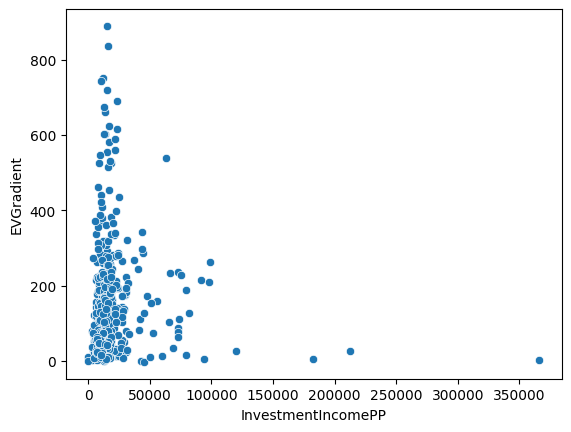

In [16]:
sns.scatterplot(x='InvestmentIncomePP', 
                y='EVGradient', data=dfIncomeSource)

<Axes: xlabel='BenefitIncomePP', ylabel='EVGradient'>

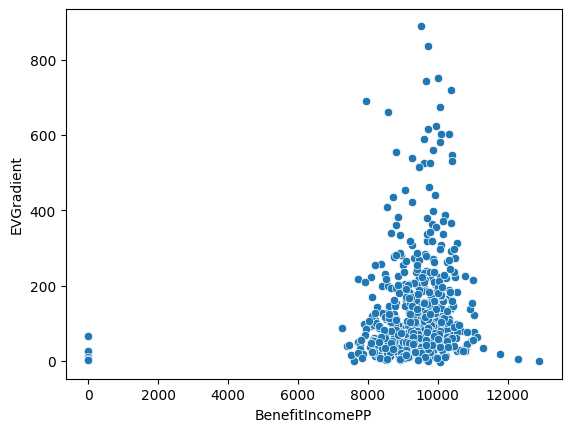

In [17]:
sns.scatterplot(x='BenefitIncomePP', 
                y='EVGradient', data=dfIncomeSource)

<Axes: xlabel='OtherIncomePP', ylabel='EVGradient'>

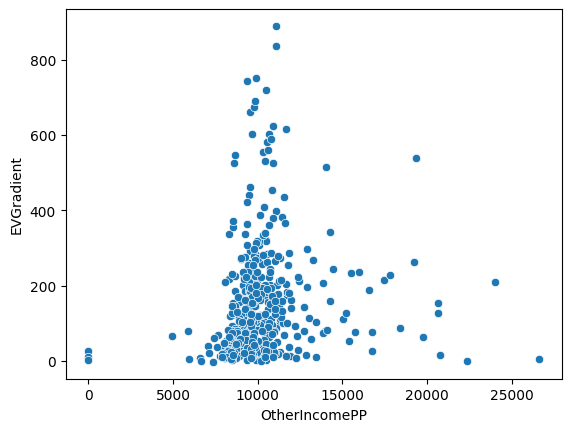

In [18]:
sns.scatterplot(x='OtherIncomePP', 
                y='EVGradient', data=dfIncomeSource)

Perform Multiple Linear Regression:

In [19]:
dfMultiRegression = dfIncomeSource.copy() 
del dfMultiRegression['FSA'] 

#Change Urban indicator from Y,N to numeric: 0,1 
dfMultiRegression['Urban1']   = 0 
dfMultiRegression.loc[dfMultiRegression['Urban'] == 'N', 'Urban1'] = 0 
dfMultiRegression.loc[dfMultiRegression['Urban'] == 'Y', 'Urban1'] = 1 
del dfMultiRegression['Urban'] 
dfMultiRegression = dfMultiRegression.rename(columns={'Urban1': 'Urban'}) 

# Replace null values with 0 
dfMultiRegression["EmploymentIncomePP"].fillna(0, inplace = True) 
dfMultiRegression["SelfEmpIncomePP"].fillna(0, inplace = True) 
dfMultiRegression["PensionIncomePP"].fillna(0, inplace = True) 
dfMultiRegression["InvestmentIncomePP"].fillna(0, inplace = True) 
dfMultiRegression["BenefitIncomePP"].fillna(0, inplace = True) 
dfMultiRegression["OtherIncomePP"].fillna(0, inplace = True) 
dfMultiRegression["EVGradient"].fillna(0, inplace = True)

print(dfMultiRegression.head(5)) 

# Create feature variables:
X = dfMultiRegression.drop('EVGradient', axis=1) 
y = dfMultiRegression['EVGradient'] 

# Split the data into train and test: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=512) 

# Build a regression model:
model = LinearRegression() 

# Fit the model to the training data:
model.fit(X_train, y_train) 

# Make predictions: 
EVGradientPrediction = model.predict(X_test) 

# Evaluate the model: 
print('\nmean_squared_error : ', mean_squared_error(y_test, EVGradientPrediction)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, EVGradientPrediction)) 

   EmploymentIncomePP  SelfEmpIncomePP  PensionIncomePP  InvestmentIncomePP  \
0               60257            16555            16943               13732   
1               45741            11975             4042               11969   
2               46746            12185            10008               12448   
3               45128            11126             8384               13593   
4               50326            11848             8893               13422   

   BenefitIncomePP  OtherIncomePP  EVGradient  Urban  
0             8563           9555  660.000000      0  
1             8107           9039   93.500000      0  
2             8120           8871  169.142857      0  
3             8492           9430  127.357143      0  
4             8416           9845  197.821429      0  

mean_squared_error :  13212.623762269006
mean_absolute_error :  79.04917838657869


Work in progress! 

This is the end of initial coding.